# Pandas Assignment on Diamonds Dataset

The Diamonds csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

**Expecting that you plot charts/graphs wherever you can**

### Find Answers to the following Questions:
1. Remove the unnamed column from the dataframe.
2. Create a new column called as "volume"(volume=x*y*z)
3. Convert every column containing categorical values(like cut, color) to numerical values(0,1..so on)
3. What is the average price of a diamond for every color? Plot a chart to validate.
4. For every color of the diamond, Plot a graph of average price & average carat value on the same graph.
5. Find out the carat value, depth value of diamond having the highest price.
6. Plot the histogram of the price & carat column.
7. Which cut of diamonds have the highest average price? Plot a chart to validate.
8. Find the number of diamonds with maximum price/volume for each colour. Plot a chart to validate.
9. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.
10. Which columns are strongly correlated to the price column?

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("./data/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df['color'].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [104]:
df = df.drop(['Unnamed: 0'],axis=1)

In [105]:
df['volume'] = np.multiply(df['x'],df['y'])
df['volume'] = np.multiply(df['volume'],df['z'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [107]:
cut_mapping = {'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}
clarity_mapping = {'SI1': 0, 'VS2': 3, 'SI2': 1, 'VS1': 2, 'VVS1': 4, 'VVS2': 5, 'IF': 6, 'I1': 7}
color_mapping = {'E':1,'F':2,'G':3,'H':4,'I':5,'J':6,'D':0}
df['color'] = df['color'].apply(lambda x:color_mapping[x])
df['cut'] = df['cut'].apply(lambda x: cut_mapping[x])
df['clarity'] = df['clarity'].apply(lambda x: clarity_mapping[x])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,0,1,1,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,3,1,2,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,1,5,3,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,3,6,1,63.3,58.0,335,4.34,4.35,2.75,51.917250


D : 3169.9540959409596
E : 3076.7524752475247
F : 3724.886396981765
G : 3999.135671271697
H : 4486.669195568401
I : 5091.874953891553
J : 5323.81801994302


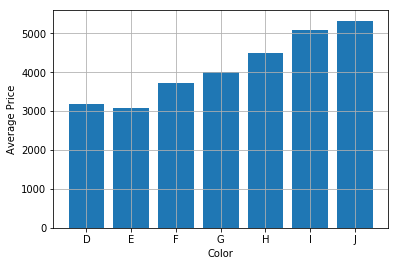

In [106]:
X = []
Y = []
color_group = df.groupby(['color'])
for name,group in color_group:
    print('{0} : {1}'.format(name,group['price'].mean()))
    X.append(name)
    Y.append(group['price'].mean())
objects = ['D','E','F','G','H','I','J']
x_coordinates = np.arange(len(objects))
plt.bar(x_coordinates,Y,align='center')
plt.xticks(x_coordinates,objects)
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.grid()

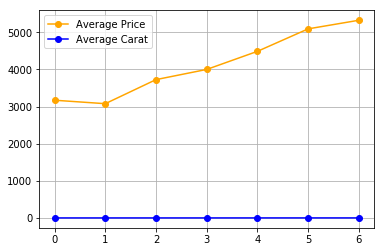

In [108]:
avg_price = []
avg_carat = []
color = []
color_group = df.groupby(['color'])
for name,group in color_group:
    avg_price.append(group['price'].mean())
    avg_carat.append(group['carat'].mean())
    color.append(name)
plt.figure()
plt.plot(color,avg_price,color='orange',marker='o',label='Average Price')
plt.plot(color,avg_carat,color='blue',marker='o',label='Average Carat')
plt.legend()
plt.grid(True)

In [112]:
max_group = df[df['price']== df['price'].max()]
print('Carat value: {0}'.format(max_group['carat'].tolist()[0]))
print('Depth Value: {0}'.format(max_group['depth'].tolist()[0]))

Carat value: 2.29
Depth Value: 60.8


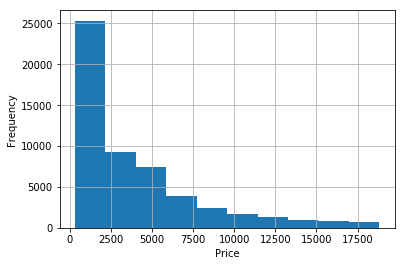

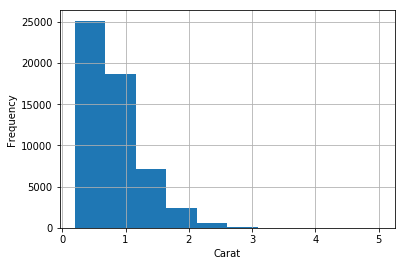

In [111]:
plt.hist(np.array(df['price']))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()
plt.hist(np.array(df['carat']))
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The cut with maximum average price is:  Premium


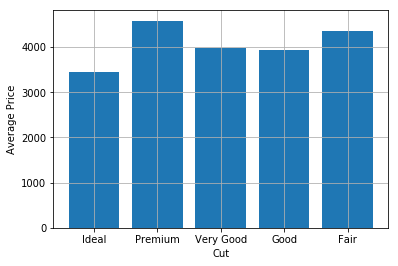

In [113]:
cut_group = df.groupby(['cut'])
X = []
Y = []
objects = ['Ideal','Premium','Very Good','Good','Fair']
mydict={}
for name,group in cut_group:
    mydict[name] = group['price'].mean()
    X.append(name)
    Y.append(group['price'].mean())
x_coordinates  = np.arange(len(objects))
max(mydict.values())
maxim = list(mydict.keys())[list(mydict.values()).index(max(mydict.values()))]
maxim_cut = list(cut_mapping.keys())[list(cut_mapping.values()).index(1)]
print('The cut with maximum average price is: ',maxim_cut)
plt.bar(x_coordinates,Y,align='center')
plt.xticks(x_coordinates,objects)
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.grid()

The number of diamonds having maximum price per volume is: 1
131.04486429506102


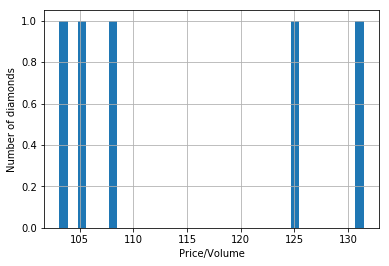

In [172]:
df = df[df['volume'] != 0]
df['ratio'] = np.divide(df['price'],df['volume'])
a = max(df['ratio'].value_counts().index.tolist())
df1 = df[df['ratio']==a]
print('The number of diamonds having maximum price per volume is:',df[df['ratio']==a]['ratio'].count())
ratio_group = df.groupby(['ratio'])
ratio = []
print(max(df['ratio'].value_counts().index))
for name,group in ratio_group:
    ratio.append(name)    
ratio = sorted(ratio)
X = ratio[-1:-6:-1]
y = df['ratio'].head(5).value_counts().values
plt.bar(X,y,align='center')
plt.xlabel('Price/Volume')
plt.ylabel('Number of diamonds')
plt.grid()

In [178]:
df = df.drop(['ratio'],axis=1)

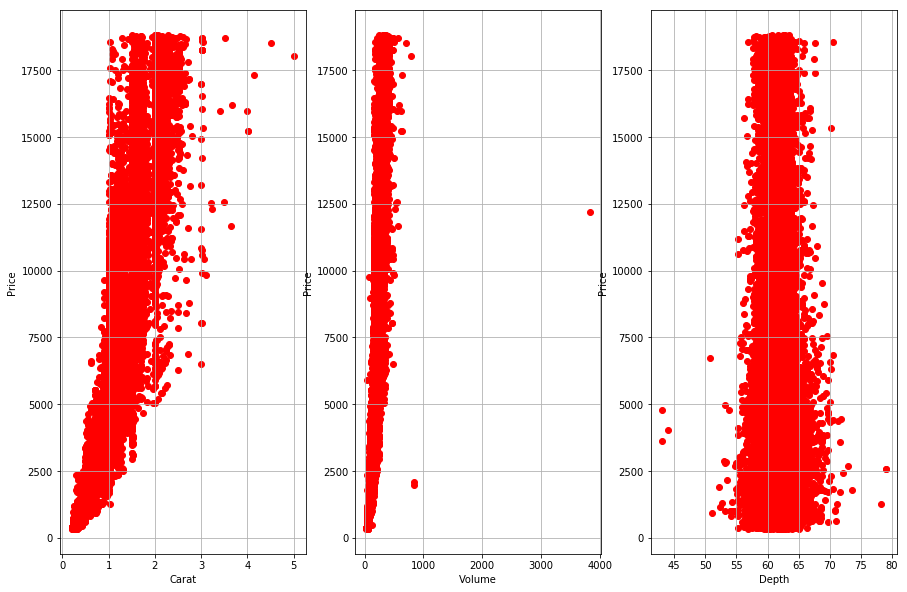

In [179]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.scatter(df['carat'],df['price'],color='red')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid()
plt.subplot(1,3,2)
plt.scatter(df['volume'],df['price'],color='red')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.grid()
plt.subplot(1,3,3)
plt.scatter(df['depth'],df['price'],color='red')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.grid()

In [180]:
df.corr().loc['price']

carat      0.921592
cut        0.053491
color      0.172431
clarity   -0.101919
depth     -0.010729
table      0.127245
price      1.000000
x          0.887231
y          0.867864
z          0.868206
volume     0.904255
Name: price, dtype: float64

## The columns which are closely correlated to price are 
## carat, volume, x,y,z